In [1]:
from sqlalchemy import create_engine
from sqlalchemy import text

In [2]:
from getpass import getpass

password = getpass()

········


In [3]:
engine = create_engine('mysql+pymysql://root:{}@localhost:3306/road_accidents'.format(password))

In [4]:
with engine.connect() as conn:
    result = conn.execute(text("select loc_police_region as 'Crash Locations' , count(*) as Crashes,Concat(round(((COUNT(*) / (SELECT COUNT(*) FROM crash_locations)) * 100),2), '%') as Percentage from crash_locations group by loc_police_region order by count(*) desc limit 5;"))

In [5]:
crash_locations = list(result)

In [6]:
crash_locations

[('Brisbane', 109831, '29.92%'),
 ('North Coast', 69775, '19.00%'),
 ('South Eastern', 64539, '17.58%'),
 ('Southern', 46120, '12.56%'),
 ('Central', 33273, '9.06%')]

In [7]:
import pandas as pd
crash_loc = pd.DataFrame(crash_locations, columns =['Crash Location','Number of Crashes','Percentage'])

In [8]:
#What are the top 5 crash locations in Queensland with the highest number of crashes?
crash_loc

,Crash Location,Number of Crashes,Percentage
0,Brisbane,109831,29.92%
1,North Coast,69775,19.00%
2,South Eastern,64539,17.58%
3,Southern,46120,12.56%
4,Central,33273,9.06%


In [9]:
#Visuals libraries
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Number of Crashes', ylabel='Crash Location'>

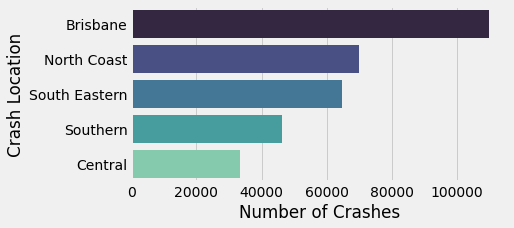

In [10]:
#Looking at the Crash_locations to Number of crashes
plt.figure(figsize=(6,3))
sns.barplot(x = 'Number of Crashes', y = 'Crash Location', data = crash_loc, palette='mako')

In [11]:
#What is the distribution of crash severity among road casualties?
with engine.connect() as conn:
    result = conn.execute(text("select Casualty_Severity as Severity, count(casualty_count) as Casualty,Concat(round(((COUNT(casualty_count) / (SELECT COUNT(casualty_count) FROM road_casualties)) * 100),2), '%') as Percentage from road_casualties group by Severity order by count(casualty_count) desc;"))

In [12]:
road_casualties = list(result)

In [13]:
road_casualties

[('Hospitalised', 10424, '33.35%'),
 ('Medically treated', 9687, '31.00%'),
 ('Minor injury', 7700, '24.64%'),
 ('Fatality', 3441, '11.01%')]

In [14]:
import pandas as pd
road_cas = pd.DataFrame(road_casualties, columns =['Severity','Number of casualties','Percentage'])
road_cas

,Severity,Number of casualties,Percentage
0,Hospitalised,10424,33.35%
1,Medically treated,9687,31.00%
2,Minor injury,7700,24.64%
3,Fatality,3441,11.01%


<AxesSubplot:xlabel='Number of casualties', ylabel='Severity'>

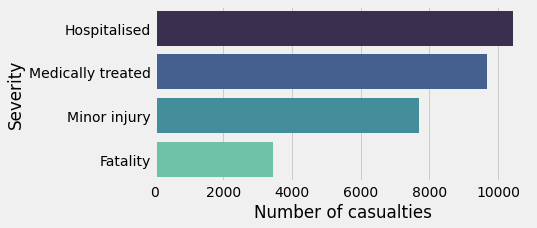

In [15]:
#Looking at the Severity to Number of casualties
plt.figure(figsize=(6,3))
sns.barplot(x = 'Number of casualties', y = 'Severity', data = road_cas, palette='mako')

In [16]:
#What is the number of drivers wearing restraints or helmets during crashes,sort by severity?
with engine.connect() as conn:
    result = conn.execute(text("select casualty_severity as Severity, count(*) as 'Drivers on Restrained', Concat(round(((COUNT(*) / (SELECT count(*) FROM crash_locations)) * 100),2), '%') as Percentage from restraint where Casualty_Restraint_Helmet_Use = 'Restrained' group by severity order by Percentage desc;"))

In [17]:
use_restraint = list(result)

In [18]:
use_restraint

[('Medically treated', 2471, '0.67%'),
 ('Hospitalised', 2426, '0.66%'),
 ('Minor injury', 2385, '0.65%'),
 ('Fatality', 1161, '0.32%')]

In [19]:
import pandas as pd
restraint = pd.DataFrame(use_restraint, columns =['Severity','Drivers on Restrained','Percentage'])
restraint

,Severity,Drivers on Restrained,Percentage
0,Medically treated,2471,0.67%
1,Hospitalised,2426,0.66%
2,Minor injury,2385,0.65%
3,Fatality,1161,0.32%


<AxesSubplot:xlabel='Drivers on Restrained', ylabel='Severity'>

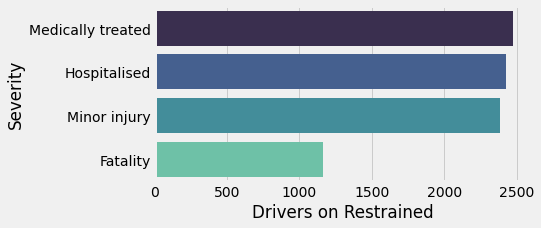

In [20]:
#Looking at the Severity to Number of casualties
plt.figure(figsize=(6,3))
sns.barplot(x = 'Drivers on Restrained', y = 'Severity', data = restraint, palette='mako')

In [21]:
#How does the severity of crashes differ based on the driver's age and gender?
with engine.connect() as conn:
    result = conn.execute(text("select Casualty_Severity, Casualty_agegroup, casualty_Gender,count(casualty_count) as Total,concat(round(((count(*) / (select count(*) from road_casualties)) *100),0),'%') as Percentage from road_casualties group by Casualty_Severity,Casualty_agegroup,Casualty_Gender order by count(casualty_count) desc;"))

In [22]:
Age_casualties = list(result)

In [23]:
Age_casualties

[('Hospitalised', '17 to 24', 'Male', 769, '2%'),
 ('Hospitalised', '30 to 39', 'Male', 763, '2%'),
 ('Medically treated', '17 to 24', 'Male', 754, '2%'),
 ('Hospitalised', '40 to 49', 'Male', 747, '2%'),
 ('Medically treated', '30 to 39', 'Male', 737, '2%'),
 ('Medically treated', '40 to 49', 'Male', 733, '2%'),
 ('Hospitalised', '50 to 59', 'Male', 723, '2%'),
 ('Hospitalised', '0 to 16', 'Male', 719, '2%'),
 ('Hospitalised', '25 to 29', 'Male', 708, '2%'),
 ('Medically treated', '25 to 29', 'Male', 707, '2%'),
 ('Hospitalised', '60 to 74', 'Male', 694, '2%'),
 ('Medically treated', '50 to 59', 'Male', 692, '2%'),
 ('Hospitalised', '17 to 24', 'Female', 668, '2%'),
 ('Hospitalised', '40 to 49', 'Female', 662, '2%'),
 ('Minor injury', '30 to 39', 'Male', 652, '2%'),
 ('Hospitalised', '30 to 39', 'Female', 650, '2%'),
 ('Minor injury', '17 to 24', 'Male', 649, '2%'),
 ('Medically treated', '0 to 16', 'Male', 640, '2%'),
 ('Medically treated', '60 to 74', 'Male', 637, '2%'),
 ('Hospital

In [24]:
import pandas as pd
age_cas = pd.DataFrame(Age_casualties, columns =['Casualty_Severity','Casualty_agegroup','casualty_Gender','Total','Percentage'])
age_cas

,Casualty_Severity,Casualty_agegroup,casualty_Gender,Total,Percentage
0,Hospitalised,17 to 24,Male,769,2%
1,Hospitalised,30 to 39,Male,763,2%
2,Medically treated,17 to 24,Male,754,2%
3,Hospitalised,40 to 49,Male,747,2%
4,Medically treated,30 to 39,Male,737,2%
...,...,...,...,...,...
59,Fatality,50 to 59,Female,144,0%
60,Fatality,30 to 39,Female,144,0%
61,Fatality,60 to 74,Female,138,0%
62,Fatality,0 to 16,Female,108,0%


In [25]:
age_cas['Casualty_agegroup'].unique()

array(['17 to 24', '30 to 39', '40 to 49', '50 to 59', '0 to 16',
       '25 to 29', '60 to 74', '75 and over'], dtype=object)

<AxesSubplot:xlabel='Total', ylabel='Casualty_agegroup'>

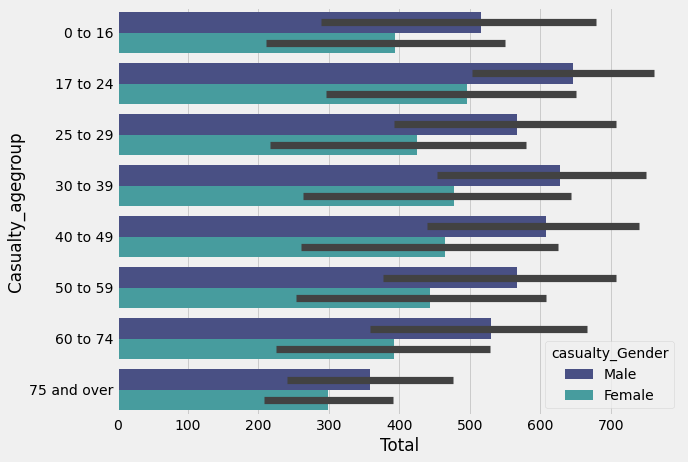

In [26]:
#looking at Promo to store type
plt.figure(figsize=(9,7))
sns.barplot(hue = 'casualty_Gender', y = 'Casualty_agegroup', x ='Total',
              data = age_cas, order = ['0 to 16','17 to 24', '25 to 29','30 to 39', 
                                       '40 to 49', '50 to 59', '60 to 74', '75 and over'], palette = 'mako')

In [27]:
#How does the number of road casualties vary by day of the week?
with engine.connect() as conn:
    result = conn.execute(text("select crash_Day_of_week as 'Day of Week',count(*) as 'Days of Casualties',Concat(round(((COUNT(*) / (SELECT count(*) FROM crash_locations)) * 100),2), '%') as Percentage from crash_locations group by crash_day_of_week order by count(*) desc;"))

In [28]:
crash_locations = list(result)

In [29]:
crash_locations

[('Friday', 61893, '16.86%'),
 ('Thursday', 56164, '15.30%'),
 ('Wednesday', 53838, '14.66%'),
 ('Tuesday', 52107, '14.19%'),
 ('Saturday', 51673, '14.07%'),
 ('Monday', 49553, '13.50%'),
 ('Sunday', 41915, '11.42%')]

In [30]:
import pandas as pd
crash_loc = pd.DataFrame(crash_locations, columns =['Days of Week','Casualties','Percentage'])
crash_loc

,Days of Week,Casualties,Percentage
0,Friday,61893,16.86%
1,Thursday,56164,15.30%
2,Wednesday,53838,14.66%
3,Tuesday,52107,14.19%
4,Saturday,51673,14.07%
5,Monday,49553,13.50%
6,Sunday,41915,11.42%


In [31]:
#Defining the custom order of days
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#Modifying our order to day of week in our dataframe
crash_loc['Days of Week'] = pd.Categorical(crash_loc['Days of Week'], categories = day_order, ordered = True)
#sorting the dataframe by the custom order
crash_loc.sort_values(by = 'Days of Week', inplace = True)
crash_loc

,Days of Week,Casualties,Percentage
5,Monday,49553,13.50%
3,Tuesday,52107,14.19%
2,Wednesday,53838,14.66%
1,Thursday,56164,15.30%
0,Friday,61893,16.86%
4,Saturday,51673,14.07%
6,Sunday,41915,11.42%


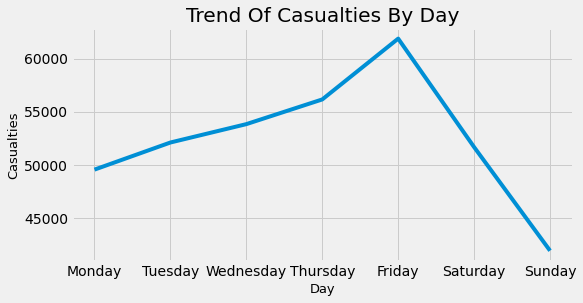

In [32]:
plt.figure(figsize= (8,4))
plt.plot(crash_loc['Days of Week'],crash_loc['Casualties'] )
plt.title('Trend Of Casualties By Day')
plt.xlabel('Day', fontsize = 13)
plt.ylabel('Casualties', fontsize = 13)
plt.show()